In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import cdflib

pd.set_option('display.max_columns', None) #Change settings in Pandas so it shows all columns

In [3]:

#filepath = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/NWS-sondes/NWS_20190623.cls'
# df_sond = pd.read_csv(filepath, sep = ' ', skiprows= np.linspace(0, 13) )
# df_sond

In [40]:
#Filepaths
#Original data

#filepath_org = '../Misc_data/US-PFl_HH_201906010000_201911010000.csv' #PFL Ameriflux data
#filepath_org = '../Misc_data/US-PFb_HH_201906010000_201911010000.csv'
#filepath_org = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/Ameriflux/US-PFk_HH_201906010000_201911010000.csv' #PFk
filepath_org = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/Ameriflux/US-PFg_HH_201906010000_201911010000.csv' #PFj 
#filepath_org = '


#Gap-filled data
#filepath_gf= '../Misc_data/PFL_gap_filled.txt' #PFL gap-filled data
#filepath_gf= '../Misc_data/PFb_gap_filled.txt' #PFb gap-filled data
#filepath_gf = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/gapfilled/REddyProc/REddyResults_US-PFj_20201021_890765854/output.txt' #PFj -1
#filepath_gf = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/gapfilled/REddyProc_v2/REddyResults_US-PFL_20210715_64265724/output.txt' #PFj -2
#filepath_gf = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/gapfilled/REddyProc/REddyResults_US-PFk_20201021_592742268/output.txt' #PFk
#filepath_gf = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/gapfilled/REddyProc/REddyResults_US-PFn_20201021_734481286/output.txt' #PFn
filepath_gf = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/gapfilled/REddyProc_v2/REddyResults_US-PFd*/output.txt'



filepath_PFt = 'http://co2.aos.wisc.edu/data/CHEESEHEAD-incoming/Ameriflux/US-PFt_HH_201906010000_201911010000.csv'



In [41]:
# #Read in data

## Original data
df_org = pd.read_csv(filepath_org)


# #gap-filled data
# df_gf = pd.read_csv(filepath_gf, sep = '\t', header = [0], skiprows= [1])
# #Note: row 1 has units in it. Skip because it creates isseue with the shape of arrays that was making plotting difficult

# #Set up datetime column and set at index
# df_org['dt_ts'] = pd.to_datetime(df_org['TIMESTAMP_START'], format = '%Y%m%d%H%M')
# df_gf['dt_ts'] = pd.to_datetime(df_gf['Date Time'], infer_datetime_format=True) #dt_ts means datetime timestamp
# df_org.set_index('dt_ts', inplace = True)
# df_gf.set_index('dt_ts', inplace = True)

# #Set missing values to NaN
# df_org = df_org.applymap(lambda x: np.nan if x == -9999 else x)  #Need to use this instead of .where because of string values
# df_gf = df_gf.applymap(lambda x: np.nan if x == -9999 else x) 




# # #PFt
# # df_PFt = pd.read_csv(filepath_PFt)
# # df_PFt['dt_ts'] = pd.to_datetime(df_PFt['TIMESTAMP_START'], format = '%Y%m%d%H%M')
# # df_PFt.set_index('dt_ts', inplace = True)
# # df_PFt = df_PFt.applymap(lambda x: np.nan if x == -9999 else x)


In [42]:
df_org = df_org.applymap(lambda x: np.nan if x == -9999 else x)

#Add datetime index
dt_ts = pd.to_datetime(df_org['TIMESTAMP_START'], format = '%Y%m%d%H%M') + dt.timedelta(minutes = 30) #half hour time stamp
df_org.set_index(dt_ts, inplace = True)

In [43]:
df_time = df_org.groupby(df_org.index.time).mean()
df_hour = df_org.groupby(df_org.index.hour).mean()
df_mon = df_org.groupby([df_org.index.month, df_org.index.time]).mean()

In [10]:
time_ticks = [dt.time(0), dt.time(6), dt.time(12), dt.time(18)]
tick_labels = ['00:00', '06:00', '12:00', '18:00']

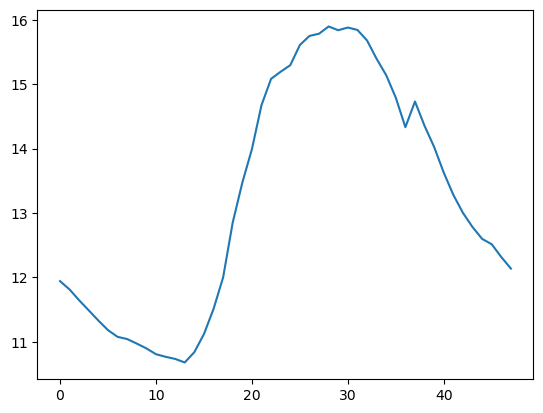

In [11]:
plt.plot(df_time.TA_1_1_1.values)
# plt.xticks(ticks = time_ticks, labels = tick_labels)
# df_time.TA_1_1_1.values

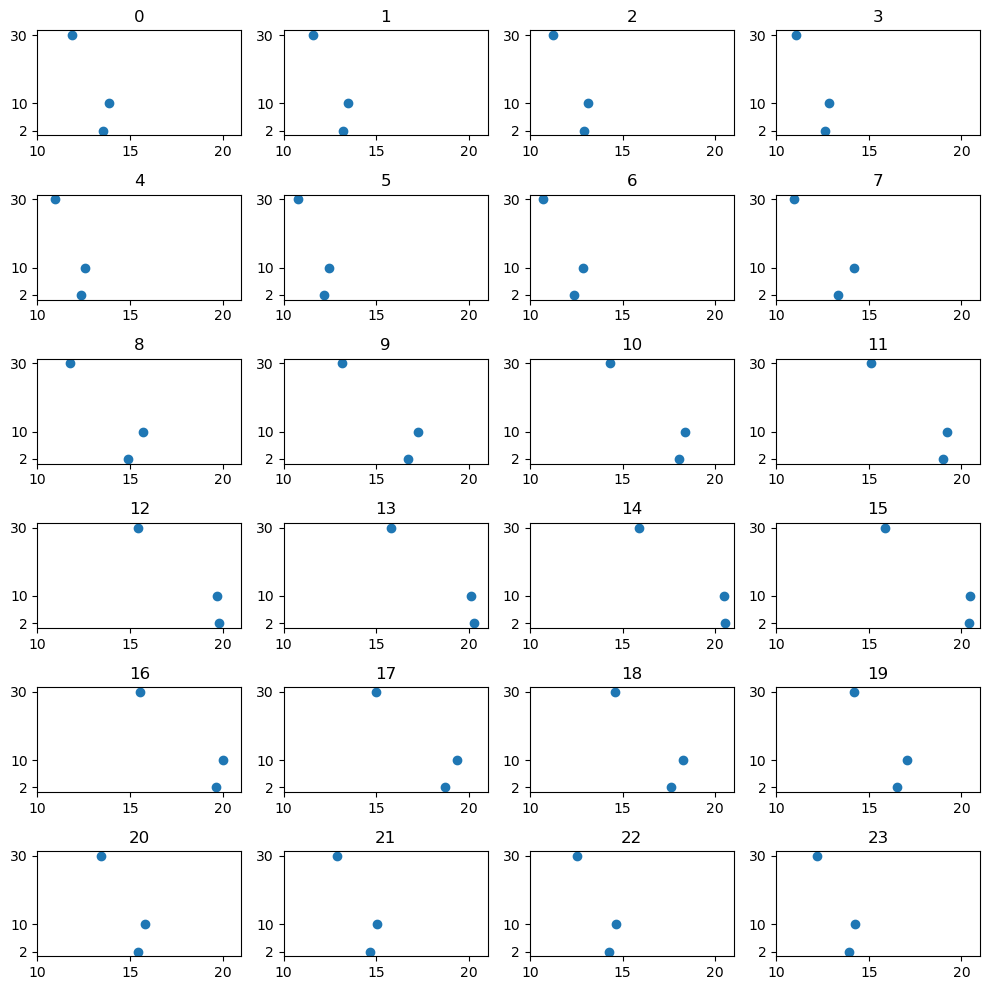

In [83]:
fig, axs = plt.subplots(6, 4, figsize = (10, 10))
for hour in df_hour.index:
    ax = axs[hour//4, hour%4]
    ax.scatter([df_hour.TA_1_1_1[hour], df_hour.TA_1_2_1[hour],df_hour.TA_1_3_1[hour]], [30, 10, 2])
    ax.set_yticks([2, 10, 30])
    ax.set_title(hour)
    ax.set_xlim([10, 21])
plt.tight_layout()
plt.savefig('./Outputs/Pfp_TA_hourly_profiles')

In [68]:
startdate = dt.datetime(2019, 7, 15)
enddate = dt.datetime(2019, 7, 20)
df_org_cut = df_org[startdate:enddate]
#df_gf_cut = df_gf[startdate:enddate]

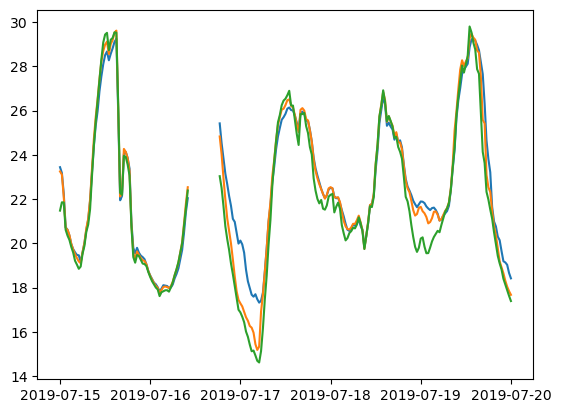

In [69]:
df_day = df_org.groupby(df_org.index.hour).mean()
plt.plot(df_org_cut.TA_1_1_1)
plt.plot(df_org_cut.TA_1_2_1)
plt.plot(df_org_cut.TA_1_3_1)

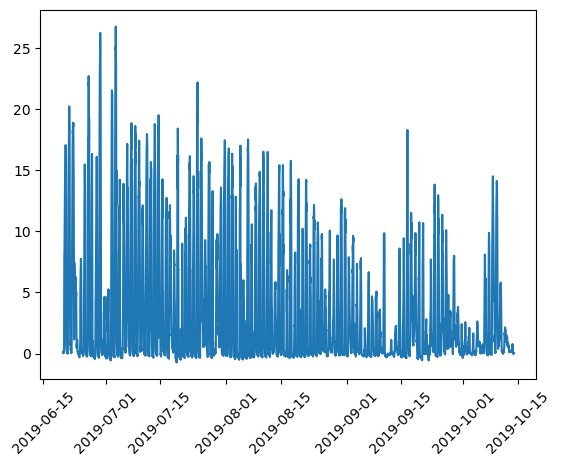

In [66]:
#Plot a variable from df

var = 'VPD_f' #Chose variable to plot

#Plot timeseries of var
plt.plot(df_gf.index, df_gf[var])
plt.xticks(rotation = 45);

In [71]:
startdate = dt.datetime(2019, 5, 15)
enddate = dt.datetime(2019, 10, 15)
df_org_cut = df_org[startdate:enddate]
df_gf_cut = df_gf[startdate:enddate]


# df_PFt_cut = df_PFt[startdate:enddate]

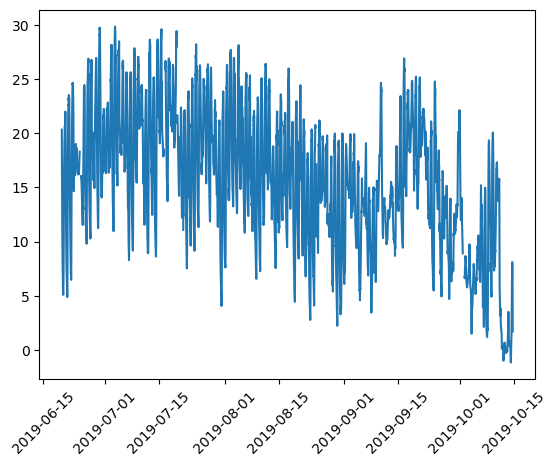

In [72]:
#plt.plot(df_gf_cut.H)
plt.plot(df_org_cut.TA_1_1_1)

#plt.plot(df_gf_cut.Tair)

plt.xticks(rotation = 45);


In [44]:
df_gf.columns[0:20]

Index(['Date Time', 'Year', 'DoY', 'Hour', 'NEE', 'LE', 'H', 'Rg', 'Tair',
       'Tsoil', 'rH', 'Ustar', 'season', 'Ustar_uStar_Thres',
       'Ustar_uStar_fqc', 'NEE_uStar_orig', 'NEE_uStar_f', 'NEE_uStar_fqc',
       'NEE_uStar_fall', 'NEE_uStar_fall_qc'],
      dtype='object')

In [45]:
df_org.columns[0:20]

Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'FC_1_1_1', 'CO2_1_1_1', 'LE_1_1_1',
       'H_1_1_1', 'USTAR_1_1_1', 'TAU_1_1_1', 'G_1_1_1', 'SG_1_1_1',
       'TS_1_1_1', 'TS_1_2_1', 'TS_1_3_1', 'TS_1_4_1', 'SWC_1_1_1',
       'SW_IN_1_1_1', 'SW_OUT_1_1_1', 'LW_IN_1_1_1', 'LW_OUT_1_1_1',
       'NETRAD_1_1_1'],
      dtype='object')

In [20]:
# filepath = '../Misc_data/isfs_20190514.nc'
filepath = '../Misc_data/ISFS/isfs_geo_hr_20190620_00.nc'
ds = nc.Dataset(filepath)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Created: 2020-04-17 14:16:42 +0000

    NIDAS_version: v1.2-1253M
    calibration_file_path: /net/isf/isfs/projects/CHEESEHEAD/ISFS/cal_files/QC/se6:/net/isf/isfs/projects/CHEESEHEAD/ISFS/cal_files/QC
    dataset: hr_qc_geo_tiltcor
    dataset_description: High rate winds in geographic coordinates using theodolite tilt
    project_config: /net/isf/isfs/projects/CHEESEHEAD/ISFS/config/cheesehead.xml;
    wind3d_horiz_coordinates: geographic
    file_length_seconds: 3600
    wind3d_horiz_rotation: 1
    wind3d_tilt_correction: 1
    dimensions(sizes): time(3600), sample(20)
    variables(dimensions): int32 base_time(), float64 time(time), float32 P_10m_nw2(time, sample), float32 P_10m_se5(time, sample), float32 P_25m_sw2(time, sample), float32 P_2m_nw3(time, sample), float32 P_2m_se4(time, sample), float32 Pirga_10m_nw2(time, sample), float32 Pirga_10m_se5(time, sample), float32 

In [34]:
vars = list(ds.variables.keys())
tower_vars = {}


In [28]:
#for tower in towers:
nw1 = vars['nw1' in vars]

In [42]:
towers = ['nw1', 'nw2', 'nw3', 'nw4', 'nw4', 'ne1', 'ne2', 'ne3', 'ne4', 'sw1', 'sw2', 'sw3', 'sw4', 'se1', 'se2', 'se3', 'se4', 'se5', 'se6']

In [43]:
for tower in towers:
    tower_vars[tower] = [var for var in vars if tower in var]
    


In [53]:
tower_vars
# plt.plot(ds['T_2m_nw2'])
# ds['T_2m_nw2']

{'nw1': ['Pirga_30m_nw1',
  'Tirga_30m_nw1',
  'co2_30m_nw1',
  'diagbits_30m_nw1',
  'h2o_30m_nw1',
  'irgadiag_30m_nw1',
  'ldiag_30m_nw1',
  'tc_30m_nw1',
  'u_30m_nw1',
  'v_30m_nw1',
  'w_30m_nw1',
  'P_30m_nw1',
  'RH_10m_nw1',
  'RH_2m_nw1',
  'RH_30m_nw1',
  'T_10m_nw1',
  'T_2m_nw1',
  'T_30m_nw1'],
 'nw2': ['P_10m_nw2',
  'Pirga_10m_nw2',
  'Tirga_10m_nw2',
  'co2_10m_nw2',
  'diagbits_10m_nw2',
  'h2o_10m_nw2',
  'irgadiag_10m_nw2',
  'ldiag_10m_nw2',
  'tc_10m_nw2',
  'u_10m_nw2',
  'v_10m_nw2',
  'w_10m_nw2',
  'RH_10m_nw2',
  'RH_2m_nw2',
  'T_10m_nw2',
  'T_2m_nw2'],
 'nw3': ['P_2m_nw3',
  'Pirga_2m_nw3',
  'Tirga_2m_nw3',
  'co2_2m_nw3',
  'diagbits_2m_nw3',
  'h2o_2m_nw3',
  'irgadiag_2m_nw3',
  'ldiag_2m_nw3',
  'tc_2m_nw3',
  'u_2m_nw3',
  'v_2m_nw3',
  'w_2m_nw3',
  'RH_2m_nw3',
  'T_2m_nw3'],
 'nw4': ['Pirga_30m_nw4',
  'Tirga_30m_nw4',
  'co2_30m_nw4',
  'diagbits_30m_nw4',
  'h2o_30m_nw4',
  'irgadiag_30m_nw4',
  'ldiag_30m_nw4',
  'tc_30m_nw4',
  'u_30m_nw4',
  